In [ ]:
# Core Sentiment Analysis

In [ ]:
# Only Reviews Dataframe taken into Consideration : dfRev_uniques.csv'

In [2]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install nltk

In [5]:
!pip install spacy

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# DataframeContains Reviews only

In [4]:
dfRev = pd.read_csv('dfRev_uniques.csv')

In [5]:
dfRev.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
dfRev.head()

,review_text,sentiment_label,review_id,customer_id
0,best coffee from green mountain so far i recom...,positive,16434,7821
1,My vet told me to have my dog get these to hel...,positive,21485,246969
2,i have not gotten my order or heard anything f...,negative,104035,298715
3,No bitter aftertaste no stomach burning after ...,positive,115260,406505
4,I have purchase this coffee several times my h...,positive,9418,693062


In [7]:
dfRev.shape

(57, 4)

In [8]:
dfRev.columns

Index(['review_text', 'sentiment_label', 'review_id', 'customer_id'], dtype='object')

In [9]:
dfRev['sentiment_label'].value_counts()

# 44 positive reviews
# 9 neutral reviews
# 4 Negative reviews

positive    44
neutral      9
negative     4
Name: sentiment_label, dtype: int64

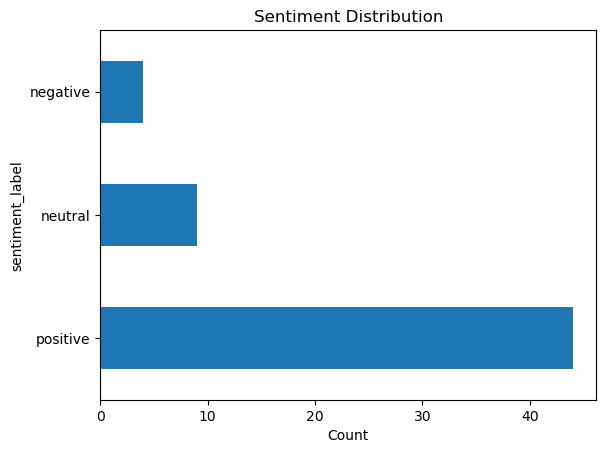

In [10]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the `sentiment` column
sentiment_counts = dfRev['sentiment_label'].value_counts()

# Create a bar plot using pandas
sentiment_counts.plot(kind='barh')

# Set the plot title and axis labels
plt.title('Sentiment Distribution')
plt.ylabel('sentiment_label')
plt.xlabel('Count')

# Display the plot
plt.show()

<Axes: ylabel='sentiment_label'>

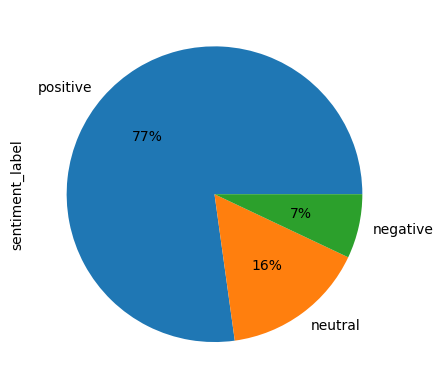

In [11]:
dfRev['sentiment_label'].value_counts().plot(kind='pie', autopct= '%1.0f%%')

In [12]:
# NA data
dfRev.isnull().sum()

review_text        0
sentiment_label    0
review_id          0
customer_id        0
dtype: int64

In [13]:
# aggregate input and output dataset 

In [14]:
x = dfRev['review_text']      # input dataset
y = dfRev['sentiment_label']  # output dataset

In [15]:
#  Data Cleaning

In [16]:
### Create a function to clean the data

In [17]:
import string

In [18]:
punct = string.punctuation

In [19]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
from spacy.lang.en.stop_words import STOP_WORDS

In [21]:
stopwords = list(STOP_WORDS) # list of stopwords

In [22]:
stopwords

['is',
 'please',
 'may',
 'regarding',
 'ca',
 'across',
 'twenty',
 'also',
 'herein',
 'thereby',
 'else',
 'along',
 'cannot',
 'just',
 'only',
 'sixty',
 'toward',
 'towards',
 'already',
 'elsewhere',
 'too',
 'full',
 'sometimes',
 'yours',
 'everyone',
 'now',
 'why',
 'latterly',
 'several',
 'about',
 'ours',
 'whereas',
 'does',
 'and',
 'someone',
 'upon',
 'twelve',
 'nevertheless',
 'same',
 'empty',
 'among',
 'two',
 'within',
 'by',
 'yet',
 'serious',
 'everything',
 'out',
 'below',
 'make',
 'whereby',
 'take',
 'side',
 'become',
 'others',
 'i',
 'although',
 'might',
 'over',
 'wherever',
 'moreover',
 'whenever',
 'n‘t',
 'nine',
 'been',
 'various',
 'enough',
 '’re',
 'some',
 'formerly',
 'not',
 'herself',
 'therefore',
 'least',
 'afterwards',
 'sometime',
 'well',
 'throughout',
 'none',
 'that',
 'are',
 'bottom',
 'could',
 'whither',
 'once',
 'top',
 'say',
 'such',
 'whence',
 'we',
 'at',
 'beside',
 'yourself',
 'the',
 'another',
 '’ll',
 'four',


In [ ]:
# creating a function for data cleaning

In [23]:
def text_data_cleaning(sentence):
  doc = nlp(sentence)

  tokens = [] # list of tokens
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)
 
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [24]:
# Apply text_data_cleaning function on the 'review_text' column

dfRev['text_data_cleaning'] = dfRev['review_text'].apply(text_data_cleaning)

In [25]:
dfRev.head()

,review_text,sentiment_label,review_id,customer_id,text_data_cleaning
0,best coffee from green mountain so far i recom...,positive,16434,7821,"[good, coffee, green, mountain, far, recomend,..."
1,My vet told me to have my dog get these to hel...,positive,21485,246969,"[vet, tell, dog, help, tooth, love]"
2,i have not gotten my order or heard anything f...,negative,104035,298715,"[order, hear, seller, send, 2, email]"
3,No bitter aftertaste no stomach burning after ...,positive,115260,406505,"[bitter, aftertaste, stomach, burn, drink, gre..."
4,I have purchase this coffee several times my h...,positive,9418,693062,"[purchase, coffee, time, husband, great, taste..."


In [26]:
dfRev['review_text'][2]

'i have not gotten my order or heard anything from the seller even after sending out 2 emails'

In [27]:
### Vectorization Feature Engineering (TF-IDF)

In [28]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [29]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)
# tokenizer=text_data_cleaning, tokenization will be done according to this function

In [30]:
classifier = LinearSVC()

In [31]:
#Train the model
#Splitting the dataset into the Train and Test set

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
x_train.shape, x_test.shape
# 2198 samples in training dataset and 550 in test dataset

((45,), (12,))

In [34]:
x_train.head()

29    We love this Stevia as it is one of the only o...
50    I was looking for a smooth robust coffee and I...
32    I bought this item for a christmas gift for my...
40    it is great to have sugar free koolaid availab...
37    i love tazo teas i dont really like friuty one...
Name: review_text, dtype: object

In [35]:
### Fit the x_train and y_train

In [36]:
clf = Pipeline([('tfidf',tfidf), ('clf',classifier)])
# it will first do vectorization and then it will do classification

In [37]:
clf.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x000001AE463B2290>)),
                ('clf', LinearSVC())])

In [ ]:
# in this we don't need to prepare the dataset for testing(x_test)

In [ ]:
### Predict the Test set results

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
y_pred = clf.predict(x_test)

In [40]:
# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1, 0, 1],
       [0, 0, 3],
       [0, 0, 7]], dtype=int64)

In [41]:
# classification_report
print(classification_report(y_test, y_pred))
# we are getting almost 67% accuracy

              precision    recall  f1-score   support

    negative       1.00      0.50      0.67         2
     neutral       0.00      0.00      0.00         3
    positive       0.64      1.00      0.78         7

    accuracy                           0.67        12
   macro avg       0.55      0.50      0.48        12
weighted avg       0.54      0.67      0.56        12



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
accuracy_score(y_test, y_pred)
# 67% accuracy

0.6666666666666666

In [43]:
clf.predict(["this coffee has a very funny taste to it not good you would think wolfgang it would be good dont buy this coffee this is a review of 6 people there are 6 people in my shop we all hate it not good"])
# output is negative, that means review is positive

array(['negative'], dtype=object)

In [44]:
clf.predict(["i have not gotten my order or heard anything from the seller even after sending out 2 emails"])
# output is positive, that means review is Negative

array(['positive'], dtype=object)

In [ ]:
# this coffee has a very funny taste to it not good you would think wolfgang it would be good dont buy this coffee this is a review of 6 people there are 6 people in my shop we all hate it not good

In [366]:
# i have not gotten my order or heard anything from the seller even after sending out 2 emails

In [ ]:
////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////